In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df1=pd.read_csv(r"C:\Users\gupta\Downloads\topartist_data.csv")

In [6]:
df1.head()

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,09-11-2009,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,13-01-2023,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),09-04-2021,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,30-07-2021,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,01-01-2010,13,album


In [7]:
df1.describe()

,track_number,track_popularity,track_duration_ms,artist_popularity,artist_followers,album_total_tracks
count,8778.000000,8778.000000,8778.000000,8774.000000,8.774000e+03,8778.000000
mean,5.749487,52.232855,210157.791866,69.954981,2.435487e+07,13.779790
std,6.017938,24.075221,63326.841454,19.532783,3.813769e+07,11.797943
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,1.000000,39.000000,173921.250000,60.000000,5.152768e+05,6.000000
50%,4.000000,58.000000,207276.000000,74.000000,6.272266e+06,13.000000
75%,9.000000,71.000000,239693.250000,84.000000,3.055055e+07,17.000000
max,102.000000,100.000000,811077.000000,100.000000,1.455421e+08,181.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8778 non-null   object 
 1   track_name          8776 non-null   object 
 2   track_number        8778 non-null   int64  
 3   track_popularity    8778 non-null   int64  
 4   track_duration_ms   8778 non-null   int64  
 5   explicit            8778 non-null   bool   
 6   artist_name         8774 non-null   object 
 7   artist_popularity   8774 non-null   float64
 8   artist_followers    8774 non-null   float64
 9   artist_genres       8774 non-null   object 
 10  album_id            8778 non-null   object 
 11  album_name          8776 non-null   object 
 12  album_release_date  8778 non-null   object 
 13  album_total_tracks  8778 non-null   int64  
 14  album_type          8778 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usag

In [9]:
#top 10 artists by artist popularity
topartists=df1[['artist_name','artist_popularity']].drop_duplicates().sort_values('artist_popularity',ascending=False)

In [10]:
topartists.head(10)

,artist_name,artist_popularity
2,Taylor Swift,100.0
43,Bad Bunny,95.0
146,Drake,95.0
6209,The Weeknd,94.0
196,The Weeknd,93.0
431,Sabrina Carpenter,91.0
72,Justin Bieber,91.0
4,Rihanna,90.0
32,Ariana Grande,90.0
4208,Bruno Mars,90.0


In [11]:
#top 10 tracks by track popularity
toptracks=df1[['track_name','track_popularity']].drop_duplicates().sort_values('track_popularity',ascending=False).head(10)

In [12]:
toptracks

,track_name,track_popularity
7093,The Fate of Ophelia,100
4373,Golden,99
5497,Opalite,97
6451,Elizabeth Taylor,95
3636,Man I Need,95
8659,Father Figure,94
3126,Soda Pop,94
1391,BIRDS OF A FEATHER,94
3520,Wi$h Li$t,93
2145,Your Idol,93


In [13]:
#this tells that artist popularity doesnt always guaranty a track popularity
corr=df1[['artist_popularity','track_popularity']].corr()

In [14]:
corr

,artist_popularity,track_popularity
artist_popularity,1.000000,0.455739
track_popularity,0.455739,1.000000


In [15]:
explicit_pop=df1.groupby('explicit')['track_popularity'].mean()

In [16]:
explicit_pop   #this tells that explicit are more popular tracks

explicit
False    50.475858
True     57.511861
Name: track_popularity, dtype: float64

In [17]:
df1.groupby('album_type')['track_popularity'].mean().sort_values(ascending=False)
# So, album has the most mean track popularity while compilation the least

album_type
album          55.529392
single         46.052046
compilation    40.505906
Name: track_popularity, dtype: float64

In [18]:
corr1=df1[['track_duration_ms','track_popularity']].corr()  
corr1
#this tells a general corelation b'w them but we want if a length of a song affects popularity, so we have to sort it bysome sample song lengths 
#along with popularity.

,track_duration_ms,track_popularity
track_duration_ms,1.000000,0.107116
track_popularity,0.107116,1.000000


In [20]:
df1['duration_min'] = df1['track_duration_ms'] / 60000

bins = [0,2,3,4,10]
labels = ['<2','2–3','3–4','>4']

In [21]:
df1['length_group'] = pd.cut(df1['duration_min'], bins=bins, labels=labels)

In [22]:
df1.groupby('length_group')['track_popularity'].mean()
#so , on avg, 3-4 min duration songs are the most popular

C:\Users\gupta\AppData\Local\Temp\ipykernel_47048\4069364728.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('length_group')['track_popularity'].mean()


length_group
<2     38.212670
2–3    48.416313
3–4    54.818812
>4     54.059150
Name: track_popularity, dtype: float64

In [23]:
df1[['artist_followers','track_popularity']].corr()

,artist_followers,track_popularity
artist_followers,1.00000,0.22657
track_popularity,0.22657,1.00000


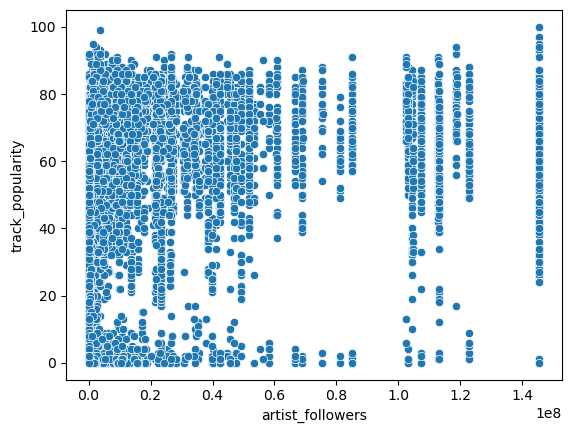

In [24]:
sns.scatterplot(x='artist_followers', y='track_popularity', data=df1)
plt.show()